# Prerequisites

This section contains the necessary libraries and functions that will be used. It must be executed so that there are no errors later.

If you already have the libraries on your computer, you do not need to install them again.

## Libraries - Install

In [1]:
#!pip install xeno-canto
#!pip install os
#!pip install pandas
#!pip install numpy
#!pip install scipy
#!pip install requests
#!pip install subprocess

## Libraries - Import

In [ ]:
import xenocanto
import json
import os
import pandas as pd
import numpy as np
import statistics as stat
from scipy import stats as st
import glob
import requests
import subprocess


import warnings
warnings.filterwarnings("ignore")

## Functions

### json to df

In [ ]:
def json_to_df():

    """
    Allows to convert json files to dataframe

    """

    print('Please enter the path where you\'ve saved your json files and remember to add \* to the end of the path before the quotes. (e.g. ...\metadata\Troglodytesaedonq_A\*")')

    path_files=glob.glob(eval("r"+input("Path: ")))


    arr=[]
    for i in path_files:
        page=open(i, "r")
        arr.append(page)

    arr2=[]
    for j in arr:
        pages=j.read()
        arr2.append(pages)

    lista_json=[]
    for k in arr2:
        pagess=json.loads(k)
        lista_json.append(pagess)


    lista_recordings=[]
    for item in lista_json:
        record=item['recordings']
        lista_recordings.append(record)

    df=pd.DataFrame()

    for i in range(len(lista_recordings)):
        df=df.append(lista_recordings[i], ignore_index=True)

    return df


### dl xenocanto rq

In [ ]:

def dl_xenocanto_rq(ID_dl, url_dl):

    """
    Allows downloading multiple audio files from the xeno-canto repository

    ID_dl: List of file names you want to name the downloaded files. Remember to write the file extension. For example: XC728656_Troglodytes_aedon.mp3

    url_dl: List of urls of the files you want to download from the internet. For example: https://xeno-canto.org/728656/download

    """

    print('Please enter the folder path where you want to save the downloads. Note that this action will change your current working directory')

    path_files=eval("r"+input("Path: "))
    os.chdir(path_files)


    for ID, link in zip(ID_dl, url_dl):
        url=link
        response = requests.get(url)
        f = open(ID, "wb")
        f.write(response.content)
        f.close()

    print(f"Done!...{len(os.listdir())} files downloaded successfully")

### mp3 to wav

In [ ]:
def mp3_to_wav():
    """
    Allows converting multiple mp3 files to wav

    """
    print("Please press shift(windows) or option(mac) key while right clicking on the folder and click 'copy as path' or 'copy as pathname' ")

    input_dir = eval("r"+(input("Path where the mp3 files are stored: ")))
    output_dir = eval("r"+(input("Path where you want to save the wav files: ")))

    files_list = []

    for path in os.listdir(input_dir):
        if os.path.isfile(os.path.join(input_dir, path)):
            files_list.append(path)

    for file_nm in files_list:
        print(file_nm)
        subprocess.call(['ffmpeg', '-i', os.path.join(input_dir, file_nm), os.path.join(output_dir, str(file_nm.split(".")[0] + ".wav"))])

    print(f"Done!...{len(os.listdir(output_dir))} files converted successfully")

# Set current working directory

Determine your workspace

In [ ]:
path_wav=eval("r"+(input("Path: ")))
os.chdir(path_wav)
print(f"You are in: {os.getcwd()}")

Path: "C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo"
You are in: C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo


# Download Data

In this section, the audio and metadata corresponding to the records of T. aedon in xeno-canto will be downloaded.

## Metadata

First, the metadata of the records of *Troglodytes aedon* in xeno-song will be downloaded in order to see how many audios the platform has, the type of sound, the location, GPS, notes, etc.

In [ ]:
#!xeno-canto -m Troglodytes aedon q:A

The json_to_df function was used to convert all the downloaded metadata to a dataframe and now the exploratory analysis will begin

In [ ]:
df_Troglodytes=json_to_df()

Please enter the path where you've saved your json files and remember to add \* to the end of the path before the quotes. (e.g. ...\metadata\Troglodytesaedonq_A\*")
Path: "C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo\Trogodytes_aedon_metadata\*"


In [ ]:
#aqui solamente cree una columna con el nombre completo de la especie
df_Troglodytes['sct_name']=df_Troglodytes['gen']+'_'+df_Troglodytes['sp']

## Audio

### mp3

All *Troglodytes aedon* chants stored in the xeno-song repository that have an A quality (highest quality) will be downloaded. The number of records of T. aedon to date June 28, 2022 at 8:40 p.m. is 637

To download the audios, the dl_xenocanto_rq function will be used, which uses a request to download the file from the url. This function requires two parameters: a list with the names that will be given to the downloaded files and another list with the urls of the files to download.

In [ ]:
#lista de nombres de archivo
ID_dl=[]
for i,j in zip(list(df_Troglodytes.loc[:,'id']),list(df_Troglodytes.loc[:,'sct_name'])):
    ID_dl.append('XC'+i+'_'+j+'.mp3')

#lista de urls a descargar
url_dl=list(df_Troglodytes.loc[:,'file'])

In [ ]:
#dl_xenocanto_rq(ID_dl, url_dl)

### conversion to wav

The mp3 files that were downloaded must be converted to wav format because some libraries such as librosa cannot work with mp3

In [ ]:
#mp3_to_wav()

# Exploratory Data Analisys (EDA)

## Distribution map of Troglodytes aedon

In [ ]:
#esto solo es para exportar el dataframe y poder hacer el mapa en my maps
#df_Troglodytes.to_csv(r'C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo\df_Troglodytes.csv')

In [ ]:
from IPython.display import IFrame
IFrame(src="https://www.google.com/maps/d/embed?mid=1F2tXFcmXXpP8uN6Wy_XQnMjFXz-Np5_g&ehbc=2E312F", width=640, height=480)

## Audios by country

In [ ]:
# dataframe con la columna id_XC y cnt
path_db= r"C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo\df_Troglodytes.csv"
database=pd.read_csv(path_db)

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#cantidad de audios por pais
database['cnt'].value_counts().iplot()

In [ ]:
database['cnt'].value_counts()

United States        180
Mexico                88
Brazil                75
Colombia              70
Ecuador               62
Chile                 38
Costa Rica            23
Argentina             21
Peru                  15
Panama                13
Honduras              13
Nicaragua              6
Bolivia                6
Canada                 6
Venezuela              6
El Salvador            3
French Guiana          3
Guyana                 2
Paraguay               1
Belize                 1
Grenada                1
Dominica               1
Guatemala              1
Trinidad & Tobago      1
Uruguay                1
Name: cnt, dtype: int64

## Length of recordings

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import pandas as pd
import numpy as np
import os
import glob

# dataframe con la columna id_XC y cnt
path_db= r"C:\Users\sebas\OneDrive - Universidad Icesi (@icesi.edu.co)\Documents\Tesis de maestría\Versiones del codigo\df_Troglodytes.csv"
database=pd.read_csv(path_db)

In [ ]:
duracion=list(database.length)

In [ ]:
print(max(duracion))
print(min(duracion))

07:10
00:01


In [ ]:
duracion.index('00:01')

396

In [ ]:
def convert_seconds(time):
    """
    la funcion convierte el tiempo a segundos (tipo de dato: int)

    time=lista con los tiempos
    por ejemplo:
    ['01:30',
     '00:18',
     '00:21',
     '00:43',
     '01:33',
     '01:17',
     '01:37',
     '00:14',
     '00:12',
     '00:53']

    """
    seconds=[]
    for i in time:
        min=int(i[:2])
        sec=int(i[-2:])
        x=(min*60)+sec
        seconds.append(x)

    return seconds

In [ ]:
duracion_sec=convert_seconds(duracion)

In [ ]:
sum(duracion_sec)/len(duracion_sec)

51.362637362637365

In [ ]:
dur_sec=pd.DataFrame(duracion_sec, columns=['seconds'])


In [ ]:
dur_sec

,seconds
0,58
1,15
2,13
3,6
4,38
...,...
632,17
633,38
634,52
635,15


In [ ]:
import plotly.express as px
fig = px.box(dur_sec,points="all", y='seconds',width=700)#, height=500)
fig.show()

## Stereo/mono

In [ ]:
#!pip install wave
import wave
file=r"D:\USB\Dataset_tesis\Audios\XC101563_Troglodytes_aedon.wav"
x=wave.open(file, mode=None)

In [ ]:
from wave import Wave_read
Wave_read.getnchannels(x)

1

In [ ]:
lista_audios=glob.glob(r'D:\USB\Dataset_tesis\Audios\*')
lista_audios[:10]

['D:\\USB\\Dataset_tesis\\Audios\\XC101247_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC101308_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC101427_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC101563_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC101570_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC101813_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC103480_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC104642_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC105347_Troglodytes_aedon.wav',
 'D:\\USB\\Dataset_tesis\\Audios\\XC105827_Troglodytes_aedon.wav']

In [ ]:
#lista_audios.remove(lista_audios[-1])
len(lista_audios)

637

In [ ]:
import wave
from wave import Wave_read

channels=[]
for i in lista_audios:
    x=wave.open(i, mode=None)
    y=Wave_read.getnchannels(x)
    channels.append(y)


In [ ]:
channel=dict(zip(channels,map(lambda x: channels.count(x),channels)))

In [ ]:
channel["mono"] = channel[1]
del channel[1]

channel["estereo"] = channel[2]
del channel[2]

In [ ]:
channel2#=channel

{'mono': 334, 'estereo': 303}

In [ ]:
df = pd.DataFrame()
df['mono']=[334]
df['estereo']=[303]
df

,mono,estereo
0,334,303


In [ ]:
df2 = pd.DataFrame()
df2['canales']=['mono','estereo']
df2['audios']=[334,303]
df2

,canales,audios
0,mono,334
1,estereo,303


<AxesSubplot:>

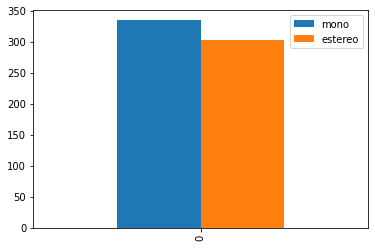

In [ ]:
df.plot(kind = 'bar', width = 0.5, figsize=(6,4))

In [ ]:
import plotly.express as px

fig=px.bar(df2, x="canales", y='audios', width=500)
fig.show()

## Type of vocalization

In [ ]:
pd.options.display.max_rows=None
tipos=dict(database['type'].value_counts())

In [ ]:
df5=pd.DataFrame()
df5['labels']=list(tipos.keys())
df5['values']=list(tipos.values())
df5

,labels,values
0,song,345
1,call,77
2,"adult, sex uncertain, song",37
3,Song,28
4,"call, song",26
5,"adult, male, song",12
6,"adult, song",12
7,alarm call,9
8,"adult, call, sex uncertain",9
9,"male, song",9


In [ ]:
len(df5.values)

62

In [ ]:
fig=px.bar(df5, x='labels', y='values')#, width=500)
fig.show()

## Other birds in the background

In [ ]:
lista=list(database['also'])
print(f'''cantidad de registros vacios:{lista.count("['']")}
cantidad de registros con otras aves:{637-lista.count("['']")}''')

df6=pd.DataFrame()
df6['estado']=['con aves', 'sin aves']
df6['audios']=[244,393]
df6

cantidad de registros vacios:393
cantidad de registros con otras aves:244


,estado,audios
0,con aves,244
1,sin aves,393


In [ ]:
fig=px.bar(df6, x='estado', y='audios', width=500)
fig.show()